# Práctica 2: Reconocimiento de formas con redes neuronales

Cuaderno de implementación de funciones

In [35]:

# Carga de los datos almacenados en formato IDX
from Modules.carga_data_MNIST import carga_data_MNIST

In [36]:
input_path = './MNIST_balanced'
file_images= 'emnist-balanced-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-labels-idx1-ubyte.gz'

[images,labels]=carga_data_MNIST(input_path,file_images,file_labels)
print(images.shape)
print(labels.shape)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************
(112800, 28, 28)
(112800,)


## Tarea 1

In [37]:
# Función crea_diccionario
from Modules.crea_diccionario import crea_diccionario

In [38]:
archivo_claves="./MNIST_balanced/claves_ASCII.txt"
caracteres=crea_diccionario(archivo_claves)
print(caracteres)


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


In [39]:
# Función que permite mostrar la primeras n imagenes ( n = columnas x filas)
from Modules.show_images import show_images

## Tarea 2

In [40]:
# Función que obtiene los arrays de numpy con las imágenes y las etiquetas
from Modules.getdataset import getdataset

In [41]:
Ximage, yimage=getdataset(images,labels, caracteres)
print(Ximage.shape,yimage.shape)

(112800, 256) (112800,)


In [42]:
from sklearn.model_selection import train_test_split

'''
El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
'''
X_train, X_test, y_train, y_test = train_test_split(Ximage, yimage, stratify=yimage, train_size = 0.7 )

In [43]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_train[0:20])
print(y_train[0:20])

(78960,)
(33840,)
(78960, 256)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.9785879e-02
  1.7122627e-04 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5853708e-09
  1.8595905e-14 0.0000000e+00]]
['q' 'I' 'd' 'F' 'S' '8' '6' 'b' '6' '2' 't' 'O' '7' 'q' 'W' 'Y' '9' 'r'
 'J' 'e']


In [44]:
'''
Seleccionamos sólo los casos en los que la clase sea "A" o "3" (por ejemplo)

X_2C de todos los ejemplos de X solo se seleccionan aquellos donde la clase es "A" o "3"
y_2C de todos los ejemplos de y solo se seleccionan aquellos donde la clase es "A" o "3"
'''
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))]

In [45]:
y_2C_num = (y_2C == 'A').astype(int)
y_2C_num

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
from sklearn.model_selection import train_test_split
X2C_train, X2C_test, y2C_train, y2C_test = train_test_split(X_2C, y_2C_num, stratify=y_2C_num, train_size = 0.7 )

## Tarea 3

In [47]:
# Carga de las funciones que permiten la creación de un perceptrón y el cálculo de la proporción de acierto.
import numpy as np

from Modules.funcion_escalon import funcion_escalon

from Modules.entrena_perceptron import entrena_perceptron

from Modules.predice import predice

from Modules.evalua import evalua


In [48]:
#import numpy as np

z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
porcentaje_acierto_perceptron_own=evalua(y2C_test, y_pred_2C_own)
print(porcentaje_acierto_perceptron_own)

0.9923611111111111


In [49]:
from sklearn.linear_model import Perceptron
#from modules import evalua Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.

clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
clf.fit(X2C_train, y2C_train)
y_pred_2C_sk = clf.predict(X2C_test)

porcentaje_acierto_perceptron_sk=evalua(y2C_test, y_pred_2C_sk)
print(porcentaje_acierto_perceptron_sk)

0.99375


### Matriz de confusión para el perceptrón propio con los conjuntos de datos A y 3

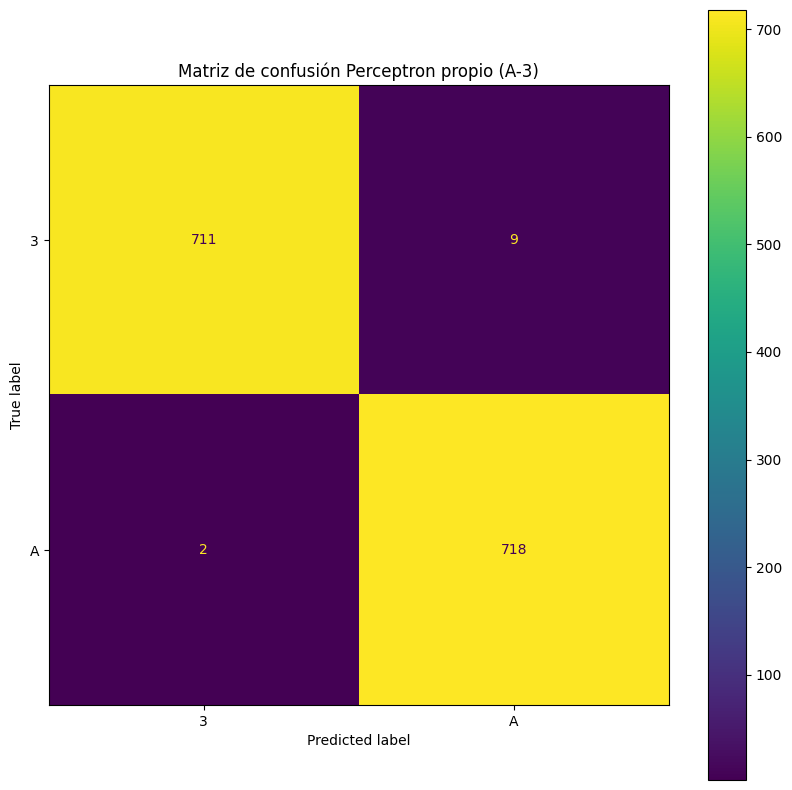

In [50]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y2C_test)

conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_own,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["3" , "A"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron propio (A-3)")
plt.show()

###  Matriz de confusión para el perceptrón de sklearn con los conjuntos de datos A y 3

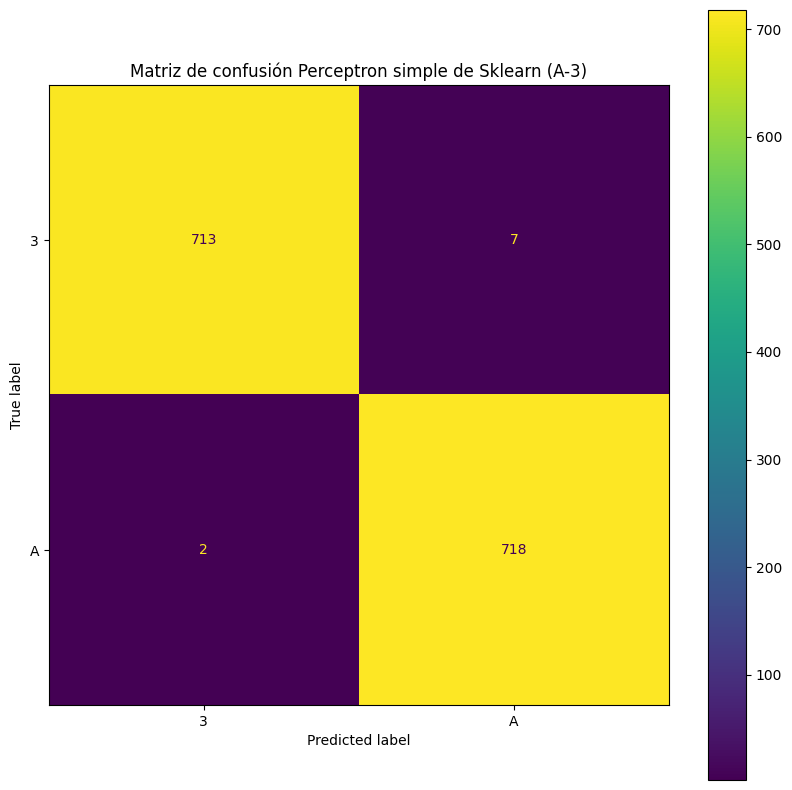

Exactitud_sk: 0.99375
Precisión_sk: [0.9972028  0.99034483]
Sensibilidad_sk: [0.99027778 0.99722222]


In [53]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y2C_test)

conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_sk,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["3" , "A"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron simple de Sklearn (A-3)")
plt.show()


accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_sk)
print("Exactitud_sk: " + str(accuracy))

precision =metrics.precision_score(y2C_test, y_pred_2C_sk,average=None) 
print("Precisión_sk: " + str(precision))

sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_sk,average=None)
print("Sensibilidad_sk: " + str(sensibilidad))


## Tarea 4

### Ejecución del entrenamiento y predicción de cada perceptrón 10 veces (obtención de 20 matrices de confusión)

----------Round 0------------------
Exactitud_own: 0.7361111111111112
Precisión_own: [0.85564854 0.67671518]
Sensibilidad_own: [0.56805556 0.90416667]
Exactitud_sk: 0.775
Precisión_sk: [0.85483871 0.7244898 ]
Sensibilidad_sk: [0.6625 0.8875]


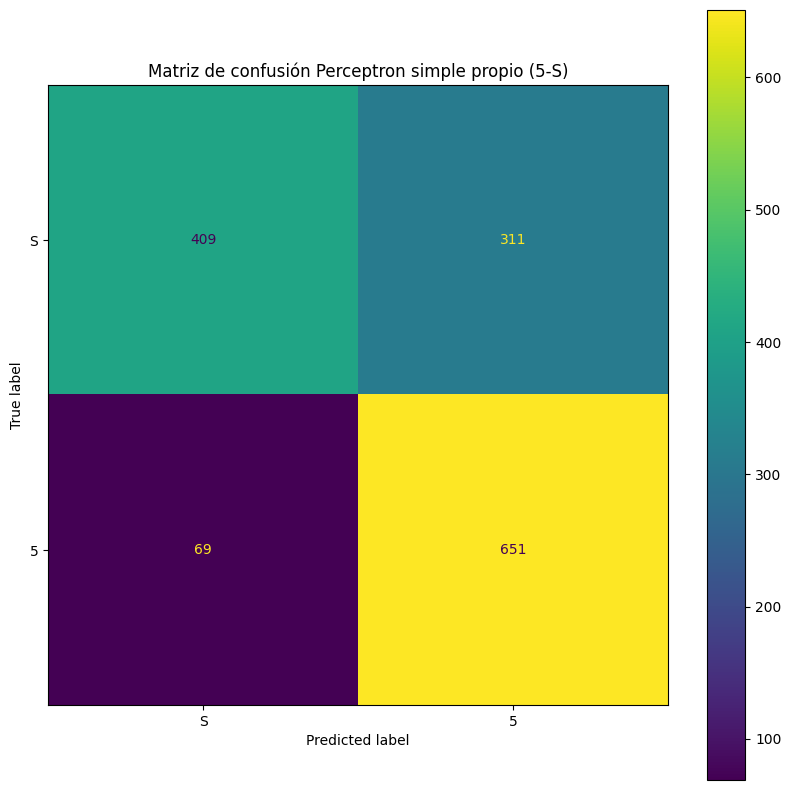

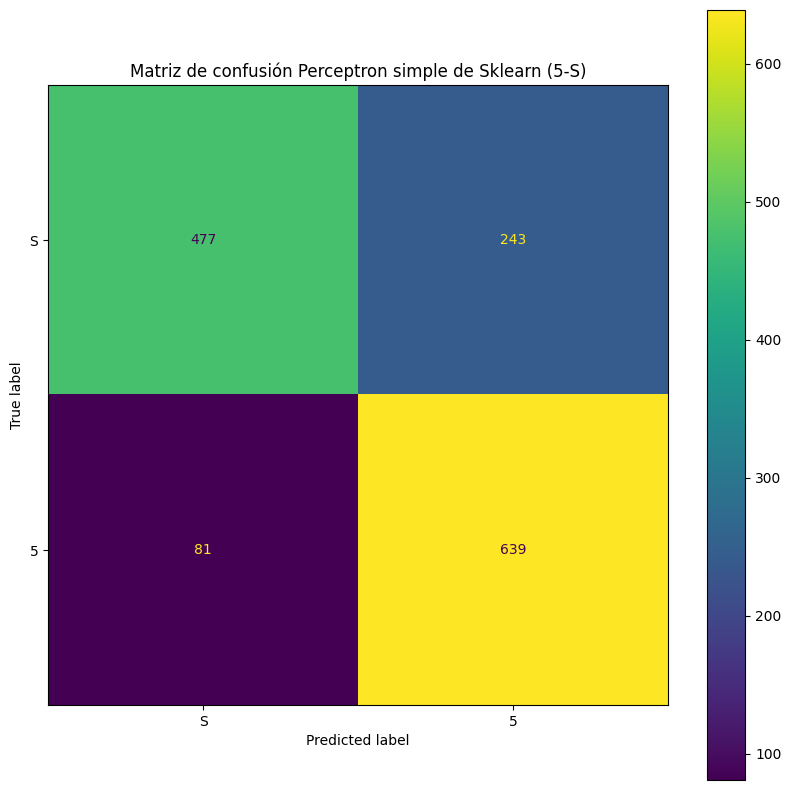

----------Round 1------------------
Exactitud_own: 0.7909722222222222
Precisión_own: [0.73149171 0.89158879]
Sensibilidad_own: [0.91944444 0.6625    ]
Exactitud_sk: 0.7854166666666667
Precisión_sk: [0.75091575 0.83091787]
Sensibilidad_sk: [0.85416667 0.71666667]


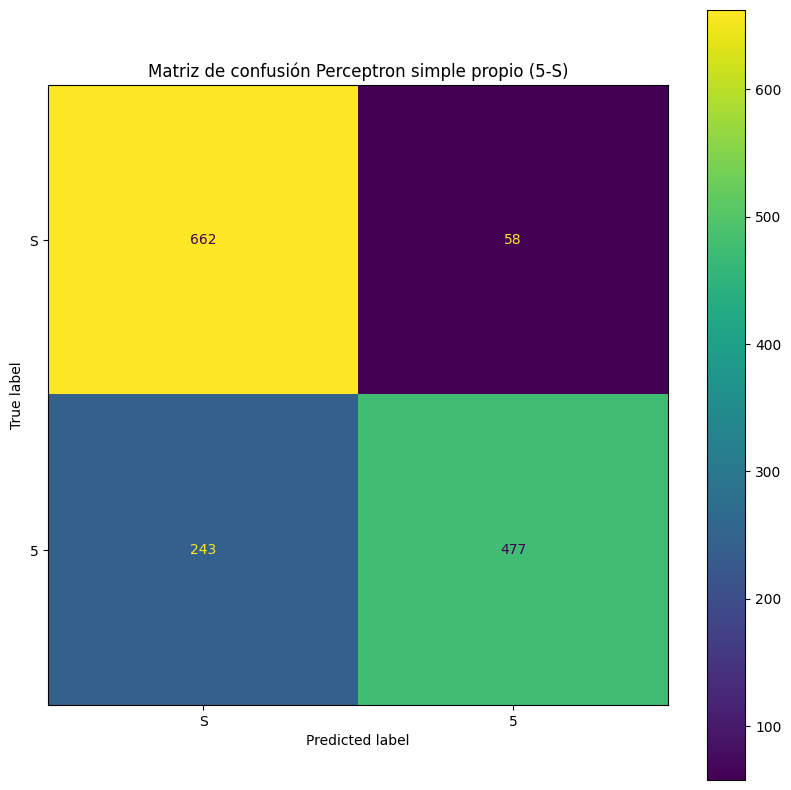

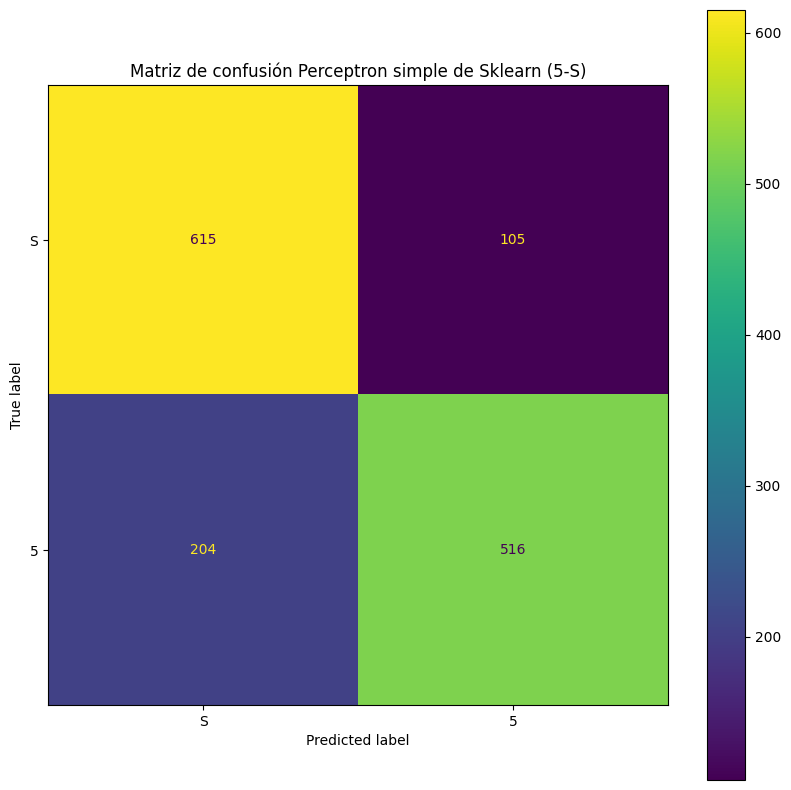

----------Round 2------------------
Exactitud_own: 0.8291666666666667
Precisión_own: [0.81769437 0.84149856]
Sensibilidad_own: [0.84722222 0.81111111]
Exactitud_sk: 0.8395833333333333
Precisión_sk: [0.82384106 0.85693431]
Sensibilidad_sk: [0.86388889 0.81527778]


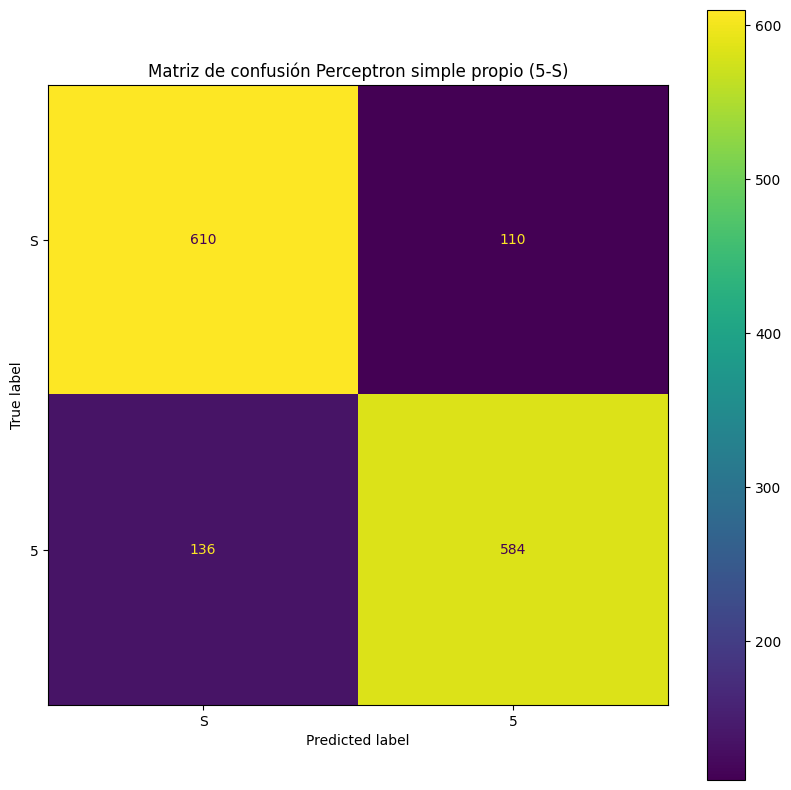

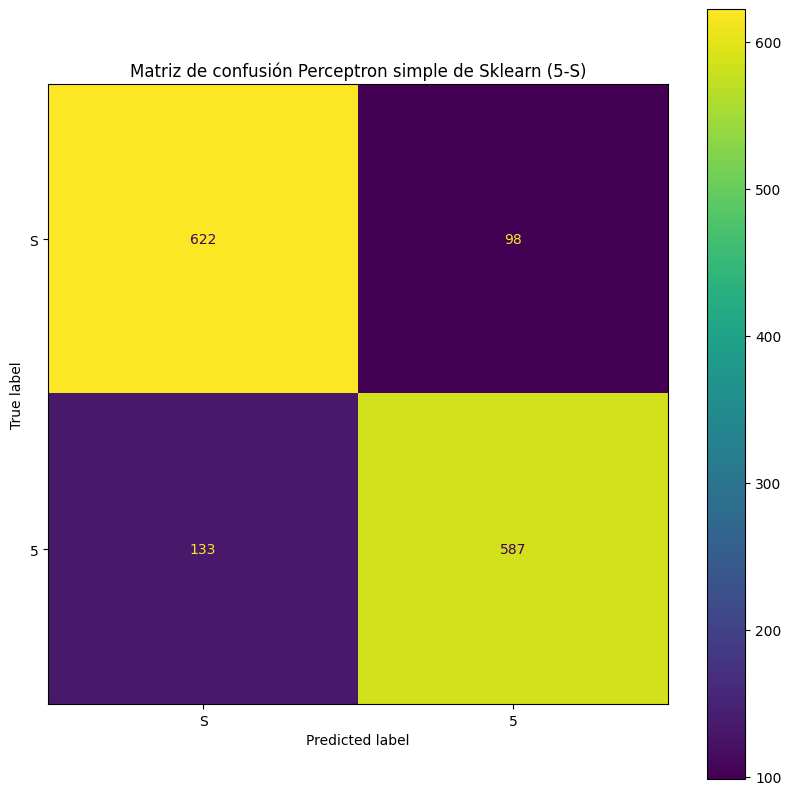

----------Round 3------------------
Exactitud_own: 0.7979166666666667
Precisión_own: [0.75812274 0.85221675]
Sensibilidad_own: [0.875      0.72083333]
Exactitud_sk: 0.8131944444444444
Precisión_sk: [0.78293601 0.85069984]
Sensibilidad_sk: [0.86666667 0.75972222]


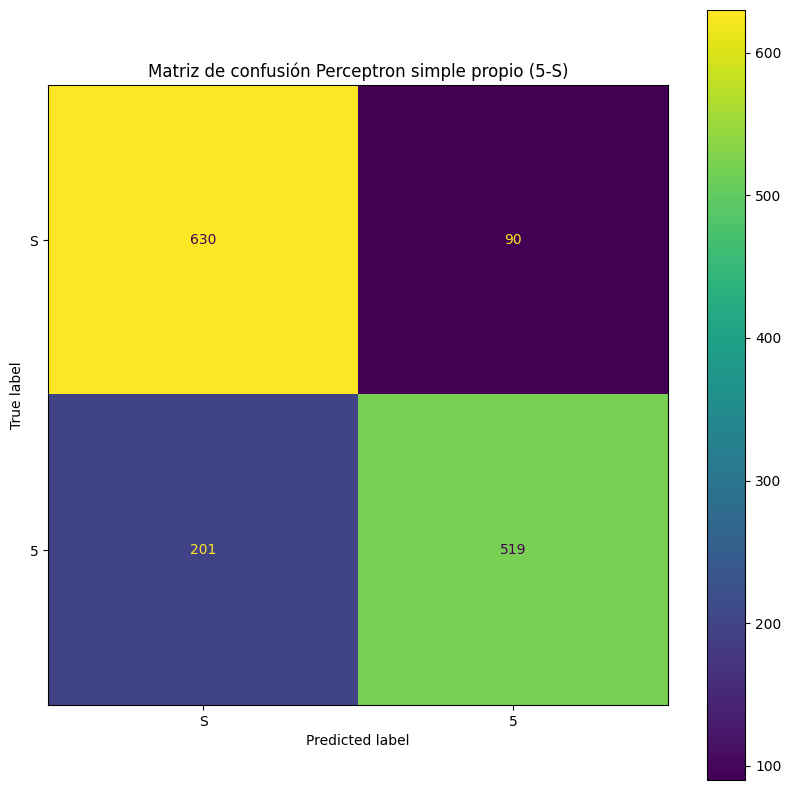

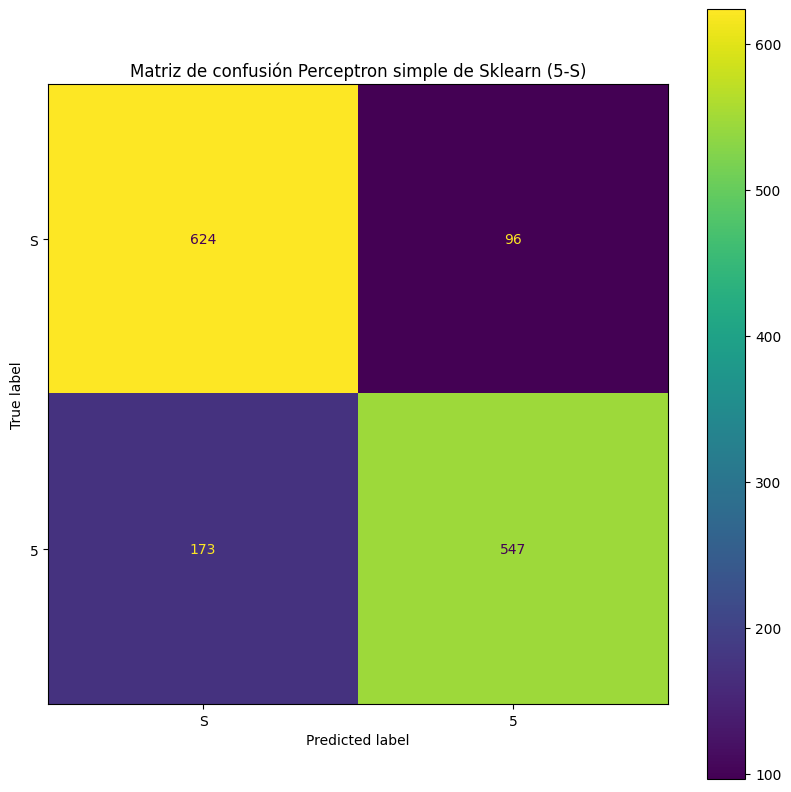

----------Round 4------------------
Exactitud_own: 0.7506944444444444
Precisión_own: [0.67339097 0.95238095]
Sensibilidad_own: [0.97361111 0.52777778]
Exactitud_sk: 0.8
Precisión_sk: [0.74 0.9 ]
Sensibilidad_sk: [0.925 0.675]


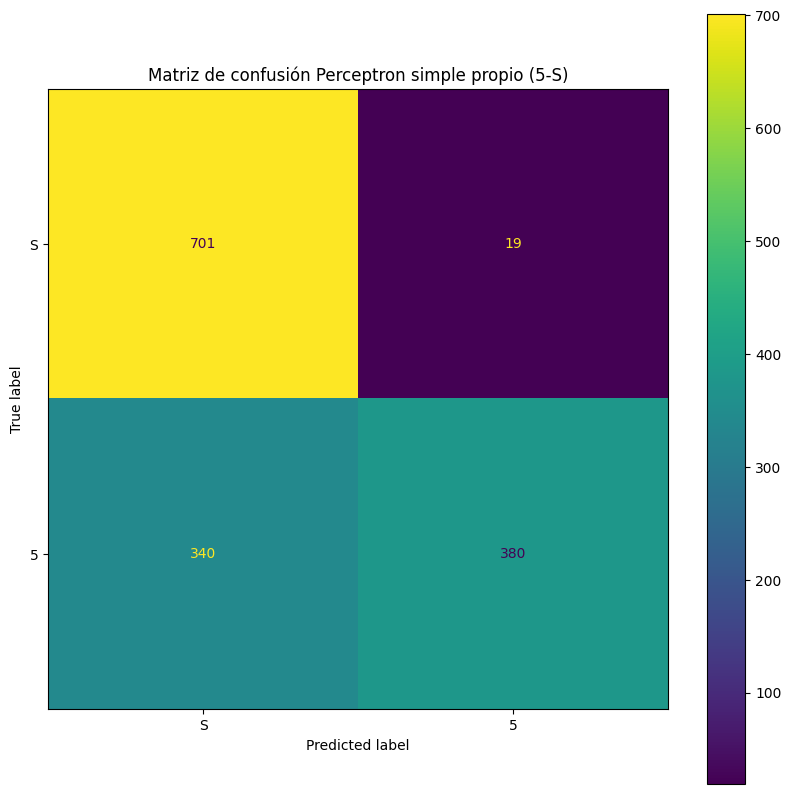

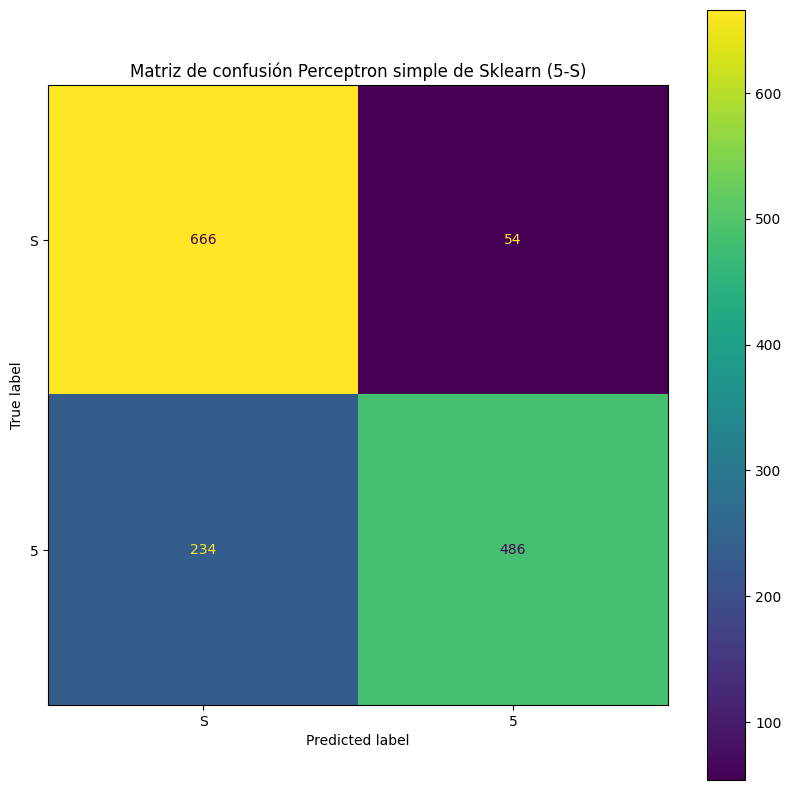

----------Round 5------------------
Exactitud_own: 0.6638888888888889
Precisión_own: [0.92446043 0.60154905]
Sensibilidad_own: [0.35694444 0.97083333]
Exactitud_sk: 0.7284722222222222
Precisión_sk: [0.90220049 0.65955383]
Sensibilidad_sk: [0.5125     0.94444444]


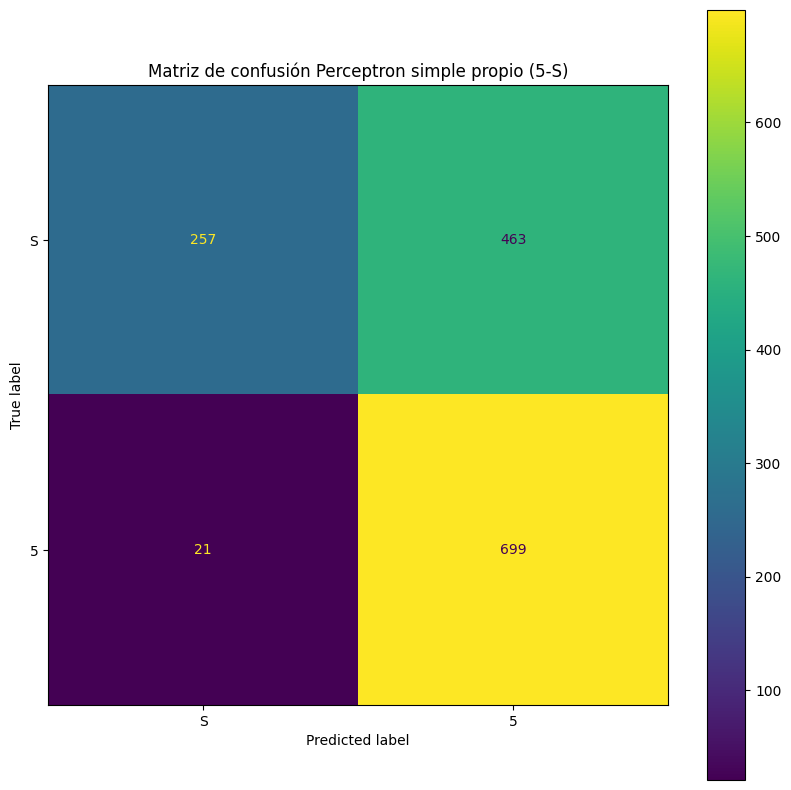

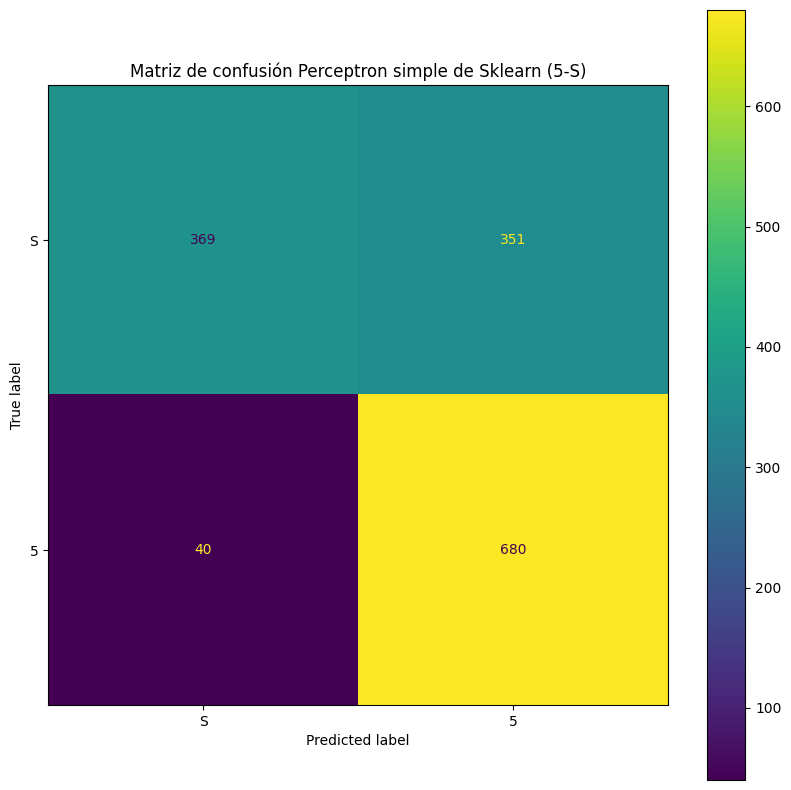

----------Round 6------------------
Exactitud_own: 0.81875
Precisión_own: [0.86602871 0.78228782]
Sensibilidad_own: [0.75416667 0.88333333]
Exactitud_sk: 0.7583333333333333
Precisión_sk: [0.68712274 0.91704036]
Sensibilidad_sk: [0.94861111 0.56805556]


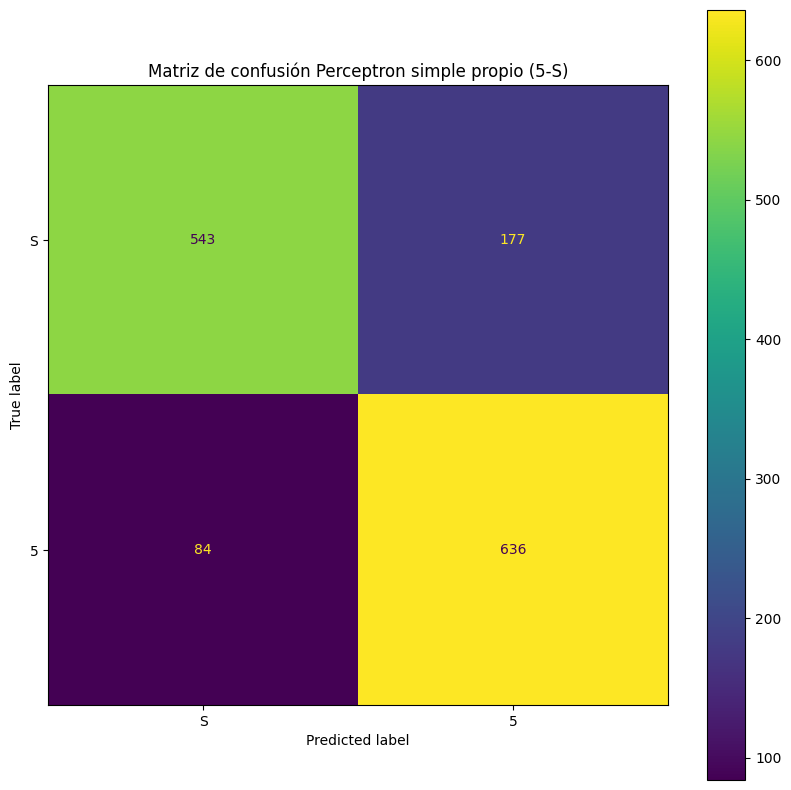

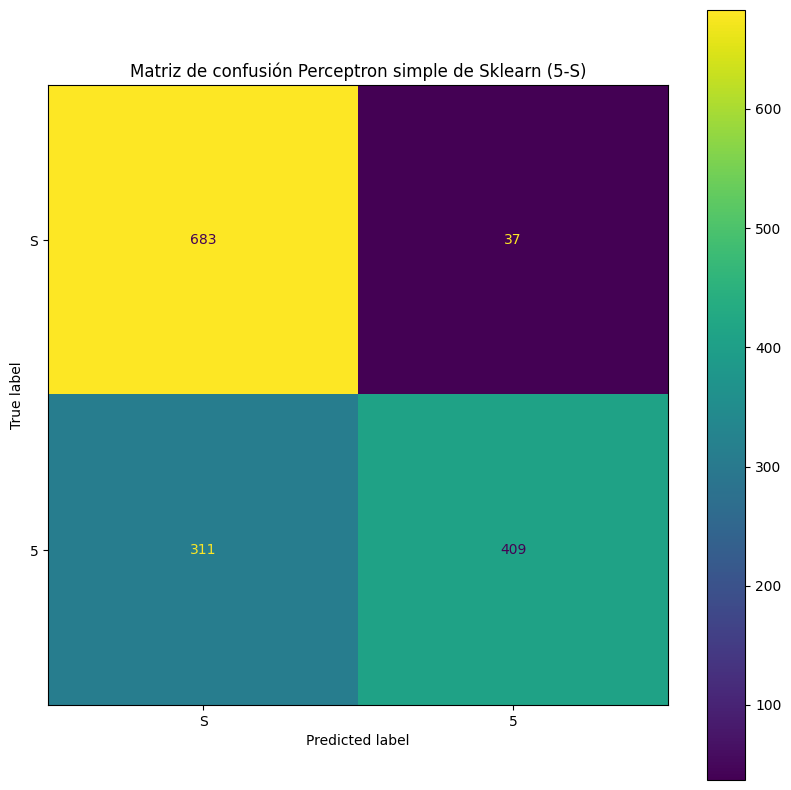

----------Round 7------------------
Exactitud_own: 0.6027777777777777
Precisión_own: [0.8814433  0.55939005]
Sensibilidad_own: [0.2375     0.96805556]
Exactitud_sk: 0.8006944444444445
Precisión_sk: [0.81061693 0.79138627]
Sensibilidad_sk: [0.78472222 0.81666667]


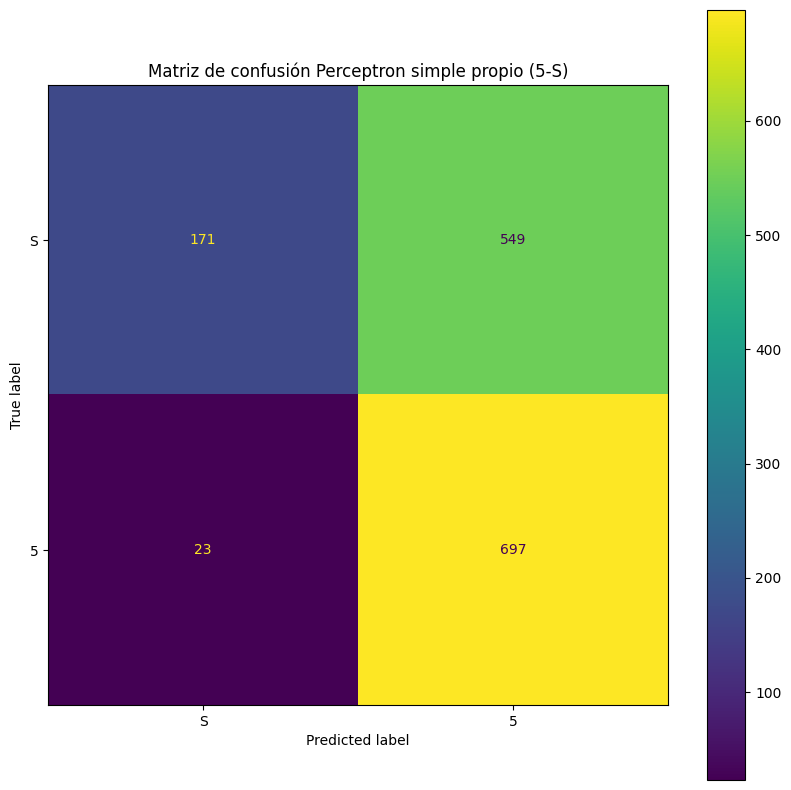

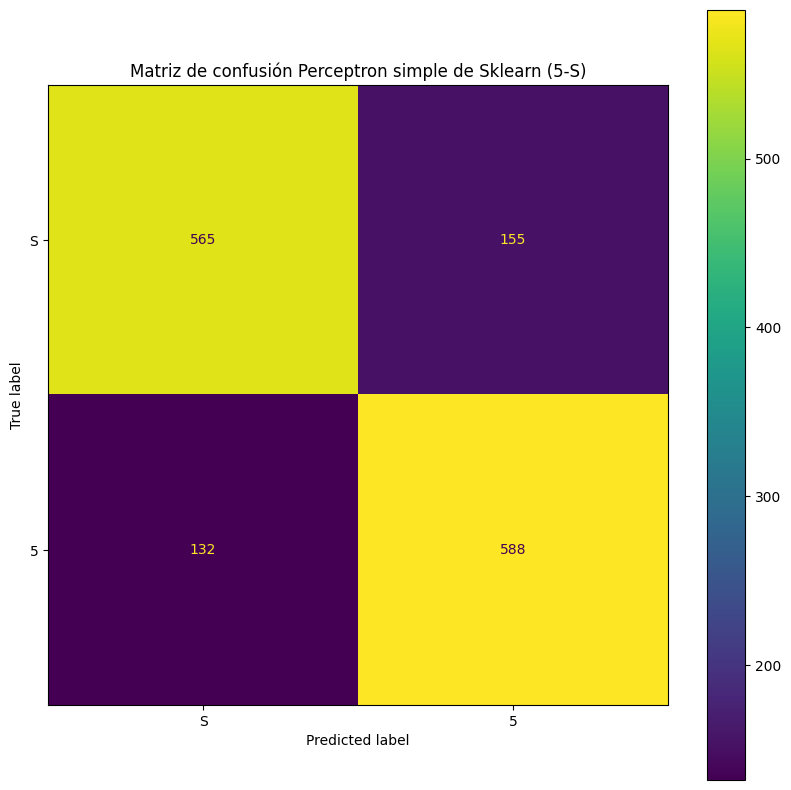

----------Round 8------------------
Exactitud_own: 0.7944444444444444
Precisión_own: [0.76835443 0.82615385]
Sensibilidad_own: [0.84305556 0.74583333]
Exactitud_sk: 0.8020833333333334
Precisión_sk: [0.73927393 0.90960452]
Sensibilidad_sk: [0.93333333 0.67083333]


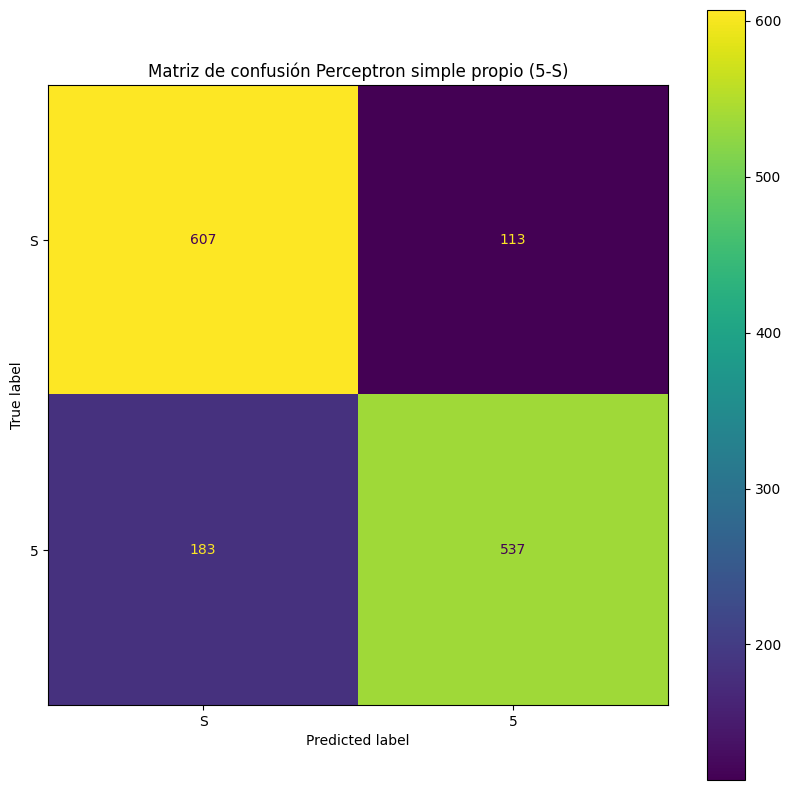

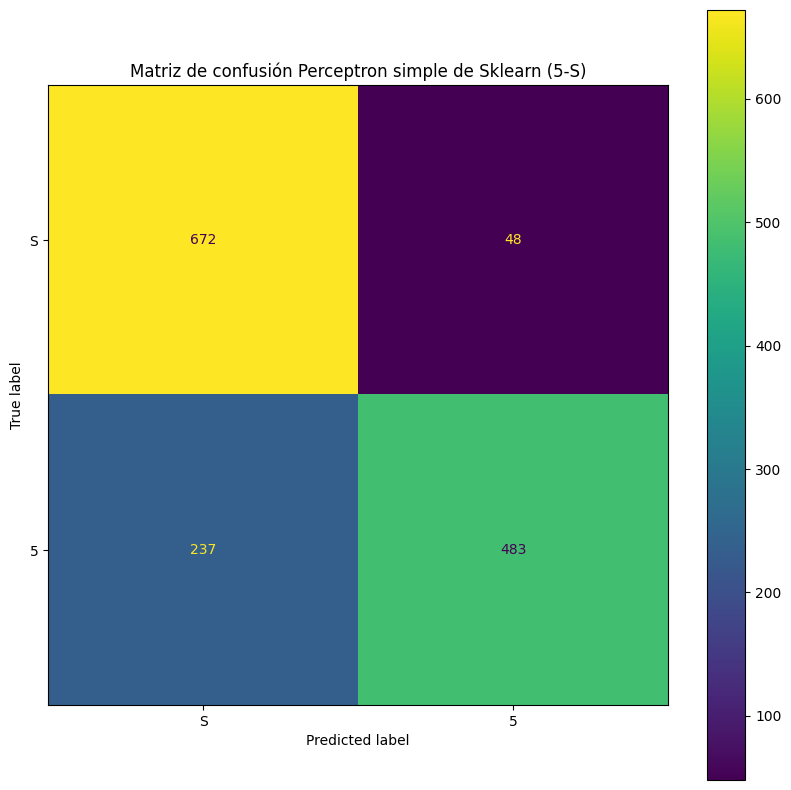

----------Round 9------------------
Exactitud_own: 0.8118055555555556
Precisión_own: [0.83063328 0.79500657]
Sensibilidad_own: [0.78333333 0.84027778]
Exactitud_sk: 0.7041666666666667
Precisión_sk: [0.63412409 0.92732558]
Sensibilidad_sk: [0.96527778 0.44305556]


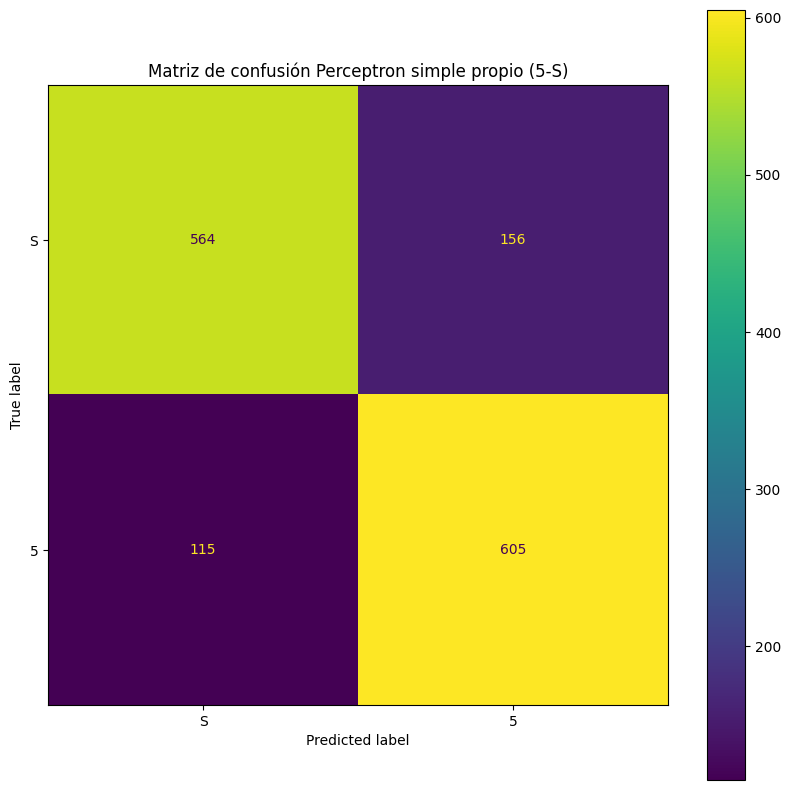

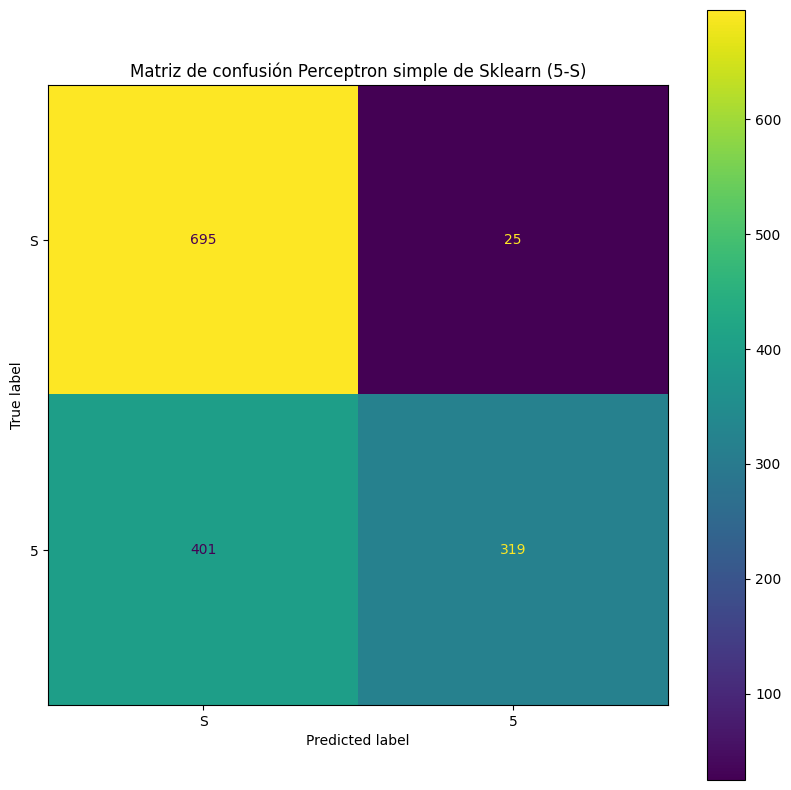

In [32]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np 

z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

for i in range(10):
    X_2C = Ximage[((yimage == '5') | (yimage == 'S'))]
    y_2C = yimage[((yimage == '5') | (yimage == 'S'))]
    y_2C_num = (y_2C == '5').astype(int)
    X2C_train, X2C_test, y2C_train, y2C_test = train_test_split(X_2C, y_2C_num, stratify=y_2C_num, train_size = 0.7)
    weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
    y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
    clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
    clf.fit(X2C_train, y2C_train)
    y_pred_2C_sk = clf.predict(X2C_test)

    print("----------Round " + str(i) + "------------------")
    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_own)
    print("Exactitud_own: " + str(accuracy))
    
    precision =metrics.precision_score(y2C_test, y_pred_2C_own,average=None) 
    #Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
    print("Precisión_own: " + str(precision))
    
    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_own,average=None)
    print("Sensibilidad_own: " + str(sensibilidad))

    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_sk)
    print("Exactitud_sk: " + str(accuracy))

    precision =metrics.precision_score(y2C_test, y_pred_2C_sk,average=None) 
    print("Precisión_sk: " + str(precision))

    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_sk,average=None)
    print("Sensibilidad_sk: " + str(sensibilidad))

    labels=np.unique(y2C_test)

    conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_own,labels=labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["S" , "5"])
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.title("Matriz de confusión Perceptron simple propio (5-S)")
    plt.show()

    conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_sk,labels=labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["S" , "5"])
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.title("Matriz de confusión Perceptron simple de Sklearn (5-S)")
    plt.show()


## Tarea 5

### Analizar la matriz de confusión y sus correspondientes métricas para todos los diferentes pares de imágenes de MNIST.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools

from Modules.analiza_pares_clases import analiza_pares_clases
'''
Esta función está pensada para que pueda cargar todos los pares de clases y los analice, aunque simplemente va a imprimir por pantalla 
las matrices de confusión de determinados conjuntos. En este caso, se mostrarán aquellas cuyas métricas representan los valores de exactitud
más altos, cercanos a la media y los más bajos. Serán 6 en total. 
Estos conjuntos se han seleccionado en base a la comparación de valores numéricos entre ellos.
'''
# Ejecución con mis datos
clases_unicas = np.unique(yimage)  # Clases únicas de tu conjunto de datos
analiza_pares_clases(Ximage, yimage, clases_unicas)


'''
Descomentar la llamada a la segunda función que genera matrices de confusión con sus correspondientes métricas para todos los pares.
'''
#from Modules.analiza_pares_clases import analiza_pares_clases_entero

'''
clases_unicas = np.unique(yimage)  # Clases únicas de tu conjunto de datos
analiza_pares_clases_entero(Ximage, yimage, clases_unicas)
'''

## Tarea 6

### Matriz de confusión del perceptron Multicapa de Sklearn

In [54]:
'''
Entrena un clasificador (Perceptrón multicapa) con el conjunto de entrenamiento
'''

'''
El perceptrón multicapa se crea utilizando la clase MLPClassifier de Scikit-learn. Los atributos empleados para este modelo son:
n_layers_: Número total de capas en la red (incluyendo entrada y salida).
n_outputs_: Número de nodos en la capa de salida, que corresponde al número de clases.
out_activation_: Función de activación. En nuestro caso utilizamos softmax para problemas de clasificación multiclase.
'''

# puede tardar unos segundos
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

classifier.fit(X_train, y_train)

print("Numero de capas: " + str(classifier.n_layers_))
print("Numero de salidas: " + str(classifier.n_outputs_))
print("Función de activación: " + str(classifier.out_activation_))

Numero de capas: 3
Numero de salidas: 47
Función de activación: softmax


In [55]:
y_pred = classifier.predict(X_test)
y_pred[:10] # muestra las 10 primeras


array(['b', 'X', 'Z', 'T', 'O', 'C', 'A', '3', 'E', 'V'], dtype='<U1')

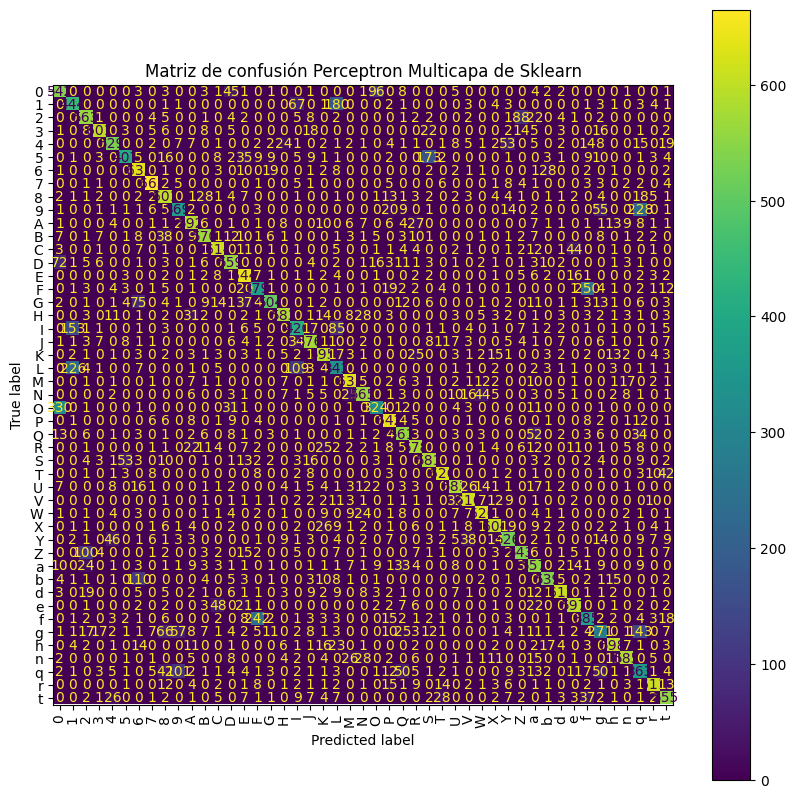

In [56]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y_test)

conf_mat = metrics.confusion_matrix(y_test, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron Multicapa de Sklearn")
plt.xticks(rotation='vertical')
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Evaluamos el modelo con las etiquetas reales y predichas

# Calcula la exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud (Accuracy): " + str(accuracy))

# Calcula la precisión por clase
precision = precision_score(y_test, y_pred, average=None, labels=np.unique(y_test))
print("Precisión por clase: " + str(precision))

# Calcula la sensibilidad (recall) por clase
sensibilidad = recall_score(y_test, y_pred, average=None, labels=np.unique(y_test))
print("Sensibilidad (Recall) por clase: " + str(sensibilidad))

# Calcula las métricas promedio (opcional)
precision_promedio = precision_score(y_test, y_pred, average='macro')
sensibilidad_promedio = recall_score(y_test, y_pred, average='macro')

print("Precisión promedio: " + str(precision_promedio))
print("Sensibilidad promedio: " + str(sensibilidad_promedio))

Exactitud (Accuracy): 0.7510638297872341
Precisión por clase: [0.5387674  0.52731591 0.72179487 0.91060606 0.8088685  0.82723577
 0.69550931 0.91597796 0.69479769 0.67335766 0.79676985 0.83700441
 0.83994528 0.76470588 0.73265074 0.54454023 0.882662   0.87933635
 0.61046512 0.80446927 0.79439252 0.45430464 0.86239782 0.80945559
 0.69230769 0.79357231 0.72015404 0.8038943  0.7025393  0.89300999
 0.83524355 0.82463186 0.86344828 0.86039886 0.75574713 0.79154519
 0.65146199 0.86102236 0.90801187 0.83613445 0.51608579 0.5387674
 0.88724036 0.89586524 0.40604027 0.89589443 0.74898785]
Sensibilidad (Recall) por clase: [0.75277778 0.61666667 0.78194444 0.83472222 0.73472222 0.56527778
 0.88194444 0.92361111 0.83472222 0.5125     0.82222222 0.79166667
 0.85277778 0.77638889 0.89444444 0.52638889 0.7        0.80972222
 0.58333333 0.8        0.82638889 0.47638889 0.87916667 0.78472222
 0.45       0.89166667 0.77916667 0.80277778 0.80694444 0.86944444
 0.80972222 0.85555556 0.86944444 0.83888889 

### Matriz de confusión del perceptron Multicapa de Sklearn con los datos nuevos

In [13]:
# Carga de los datos originales (datos de entrenamiento)

input_path = './MNIST_balanced'
file_images= 'emnist-balanced-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-labels-idx1-ubyte.gz'

[images,labels]=carga_data_MNIST(input_path,file_images,file_labels)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************


In [14]:
'''
Obtención los arrays de numpy con las imágenes y las etiquetas de entrenamiento. 
Estos datos se usan en su totalidad para entrenar a nuestro perceptrón.
'''
Ximage_nuevo, yimage_nuevo=getdataset(images,labels, caracteres)
print(Ximage.shape,yimage.shape)

(112800, 256) (112800,)


In [15]:
# Carga de los datos de test (los nuevos)

input_path = './MNIST_balanced'
file_images_test= 'emnist-balanced-test-images-idx3-ubyte.gz '
file_labels_test = 'emnist-balanced-test-labels-idx1-ubyte.gz'

[images_test,labels_test]=carga_data_MNIST(input_path,file_images_test,file_labels_test)


***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
18800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
18800
***********************************


In [16]:
'''
Obtención los arrays de numpy con las imágenes y las etiquetas de test. 
Estos datos se usan en su totalidad para hacer las pruebas.
'''
Ximage_test, yimage_test=getdataset(images_test,labels_test, caracteres)
print(Ximage_test.shape,yimage_test.shape)

(18800, 256) (18800,)


In [17]:
'''
Entrena un clasificador (Perceptrón multicapa) con el conjunto de entrenamiento con los datos originales al completo
'''

# puede tardar unos segundos
from sklearn.neural_network import MLPClassifier

classifier_test = MLPClassifier()

classifier_test.fit(Ximage_nuevo, yimage_nuevo)

print("Numero de capas: " + str(classifier_test.n_layers_))
print("Numero de salidas: " + str(classifier_test.n_outputs_))
print("Función de activación: " + str(classifier_test.out_activation_))

Numero de capas: 3
Numero de salidas: 47
Función de activación: softmax


In [ ]:
'''
Análisis de las imágenes en Ximage_test.
Se hacen las predicciones basadas en lo aprendido en el entrenamiento.
y_pred_test contiene las etiquetas de las predicciones y posteriormente se muestran las 10 primeras predicciones.
'''

y_pred_test = classifier_test.predict(Ximage_test)
y_pred_test[:10] # muestra las 10 primeras


In [ ]:
# Creación de la matriz de confusión representativa del desempeño del modelo.

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels_n=np.unique(yimage_test)

conf_mat_n = metrics.confusion_matrix(yimage_test, y_pred_test,labels=labels_n)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat_n, display_labels = labels_n)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron Multicapa de Sklearn (Datos nuevos)")
plt.xticks(rotation='vertical')
plt.show()

## Tarea 7

### Matriz de confusión de validación cruzada para perceptrón simple

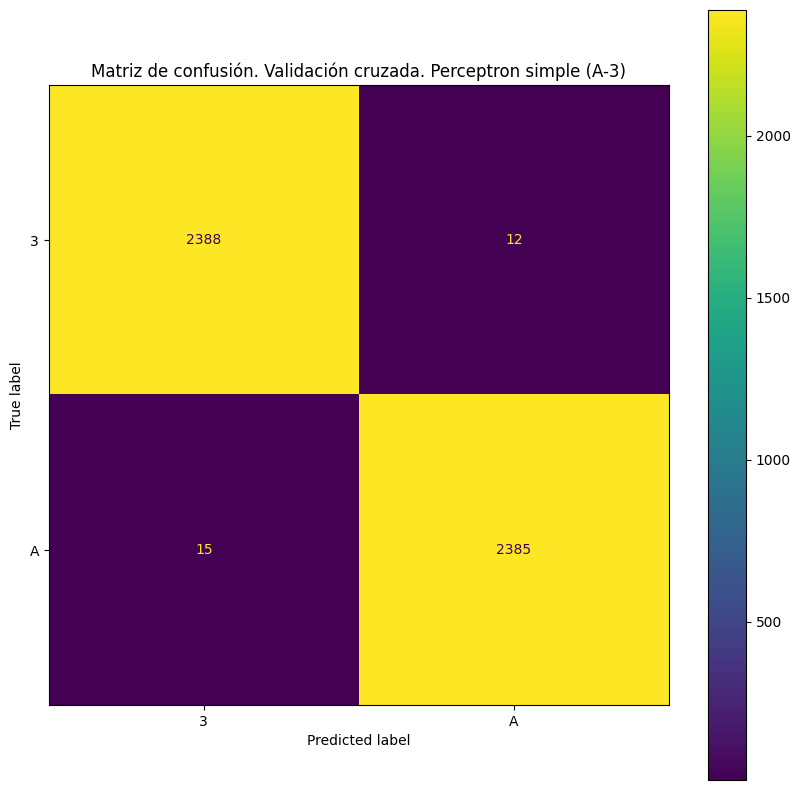

Porcentaje de acierto: 0.994375
Exactitud: 0.994375
Precisión: [0.9937578  0.99499374]
Sensibilidad: [0.995   0.99375]


In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))]
y_2C_pred = cross_val_predict(Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False), X_2C, y_2C, cv=3)
labels=np.unique(y_2C)
conf_mat = confusion_matrix(y_2C, y_2C_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión. Validación cruzada. Perceptron simple (A-3)")
plt.show()

porcentaje_acierto=evalua(y_2C, y_2C_pred)
print("Porcentaje de acierto: " + str(porcentaje_acierto))
accuracy=metrics.accuracy_score(y_2C, y_2C_pred)
print("Exactitud: " + str(accuracy))
precision =metrics.precision_score(y_2C,y_2C_pred,average=None)
print("Precisión: " + str(precision))
sensibilidad =metrics.recall_score(y_2C, y_2C_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))

### Matriz de confusión de validación cruzada para perceptrón multicapa

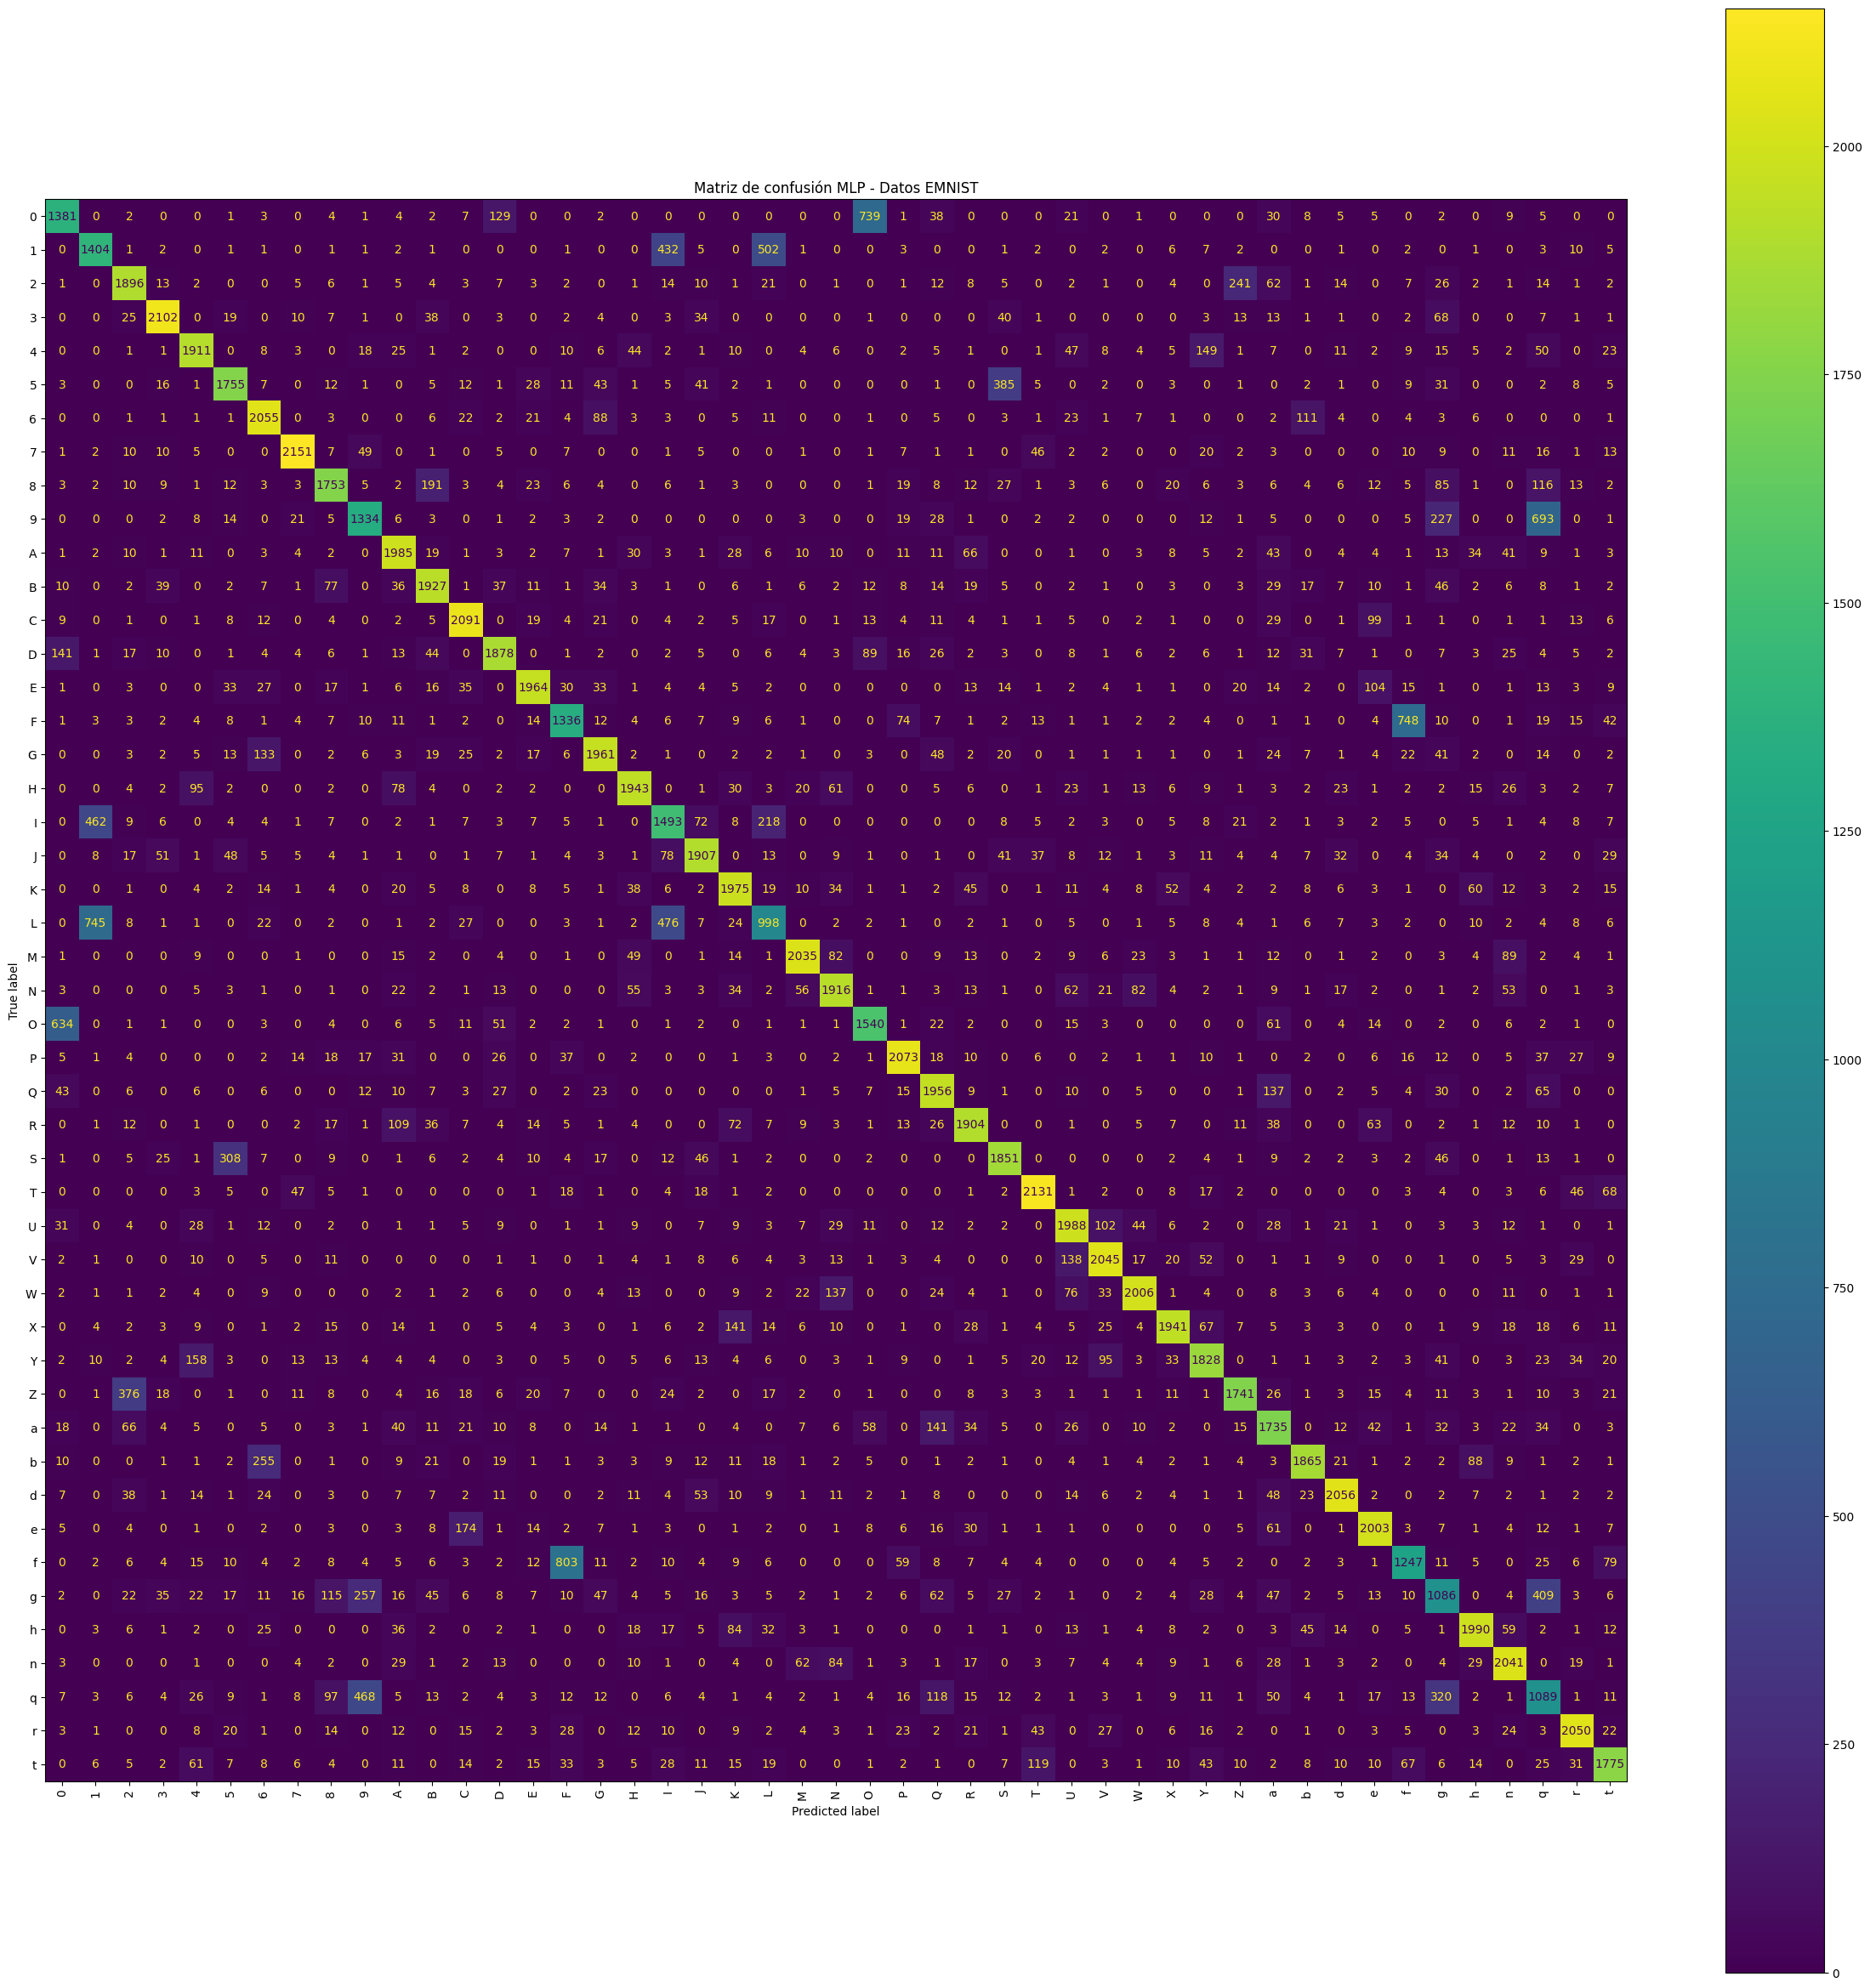

Exactitud: 0.7543617021276596
Precisión: [0.59244959 0.52722493 0.73204633 0.88505263 0.78287587 0.75941151
 0.76365663 0.91962377 0.76717724 0.60774487 0.76522745 0.77389558
 0.82485207 0.81053086 0.87756926 0.55161024 0.82847486 0.8514461
 0.55481234 0.82482699 0.77269171 0.50226472 0.89059081 0.7852459
 0.61305732 0.86411005 0.73672316 0.82424242 0.74576954 0.86696501
 0.77838684 0.84156379 0.88408991 0.8731444  0.77853492 0.81393174
 0.66628264 0.85747126 0.88202488 0.81257606 0.55669643 0.48288128
 0.85998271 0.80799683 0.39158576 0.86790855 0.7934734 ]
Sensibilidad: [0.57541667 0.585      0.79       0.87583333 0.79625    0.73125
 0.85625    0.89625    0.73041667 0.55583333 0.82708333 0.80291667
 0.87125    0.7825     0.81833333 0.55666667 0.81708333 0.80958333
 0.62208333 0.79458333 0.82291667 0.41583333 0.84791667 0.79833333
 0.64166667 0.86375    0.815      0.79333333 0.77125    0.88791667
 0.82833333 0.85208333 0.83583333 0.80875    0.76166667 0.72541667
 0.72291667 0.77708333

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
y_pred = cross_val_predict(MLPClassifier(), Ximage, yimage, cv=3)
labels=np.unique(yimage)
conf_mat = confusion_matrix(yimage, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(30,30))
cm_display.plot(ax=ax)
plt.xticks(rotation='vertical')
plt.title("Matriz de confusión MLP - Datos EMNIST")
plt.show()

accuracy=metrics.accuracy_score(yimage, y_pred)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(yimage, y_pred,average=None) 
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(yimage, y_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))

### Matriz de validación cruzada para perceptrón simple datos nuevos

In [58]:
input_path = './MNIST_balanced'
file_images_v7= 'emnist-balanced-images-idx3-ubyte.gz'
file_labels_v7 = 'emnist-balanced-labels-idx1-ubyte.gz'

[images_v7,labels_v7]=carga_data_MNIST(input_path,file_images_v7,file_labels_v7)
print(images_v7.shape)
print(labels_v7.shape)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************
(112800, 28, 28)
(112800,)


In [59]:
input_path = './MNIST_balanced'
file_images_test_v7 = 'emnist-balanced-test-images-idx3-ubyte.gz '
file_labels_test_v7 = 'emnist-balanced-test-labels-idx1-ubyte.gz'

[images_test_v7,labels_test_v7]=carga_data_MNIST(input_path,file_images_test_v7,file_labels_test_v7)
print(images_test_v7.shape)
print(labels_test_v7.shape)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
18800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
18800
***********************************
(18800, 28, 28)
(18800,)


In [60]:
import numpy as np

# Unir las imágenes y etiquetas
images_nuevo = np.concatenate((images_v7, images_test_v7), axis=0)  # Combina las imágenes
labels_nuevo = np.concatenate((labels_v7, labels_test_v7), axis=0)  # Combina las etiquetas

# Generar el dataset combinado con getdataset
Ximage_ultimo, yimage_ultimo = getdataset(images_nuevo, labels_nuevo, caracteres)

# Verificar las dimensiones de los datos combinados
print("Dimensiones del dataset combinado:")
print("Características (X):", Ximage_ultimo.shape)
print("Etiquetas (y):", yimage_ultimo.shape)


Dimensiones del dataset combinado:
Características (X): (131600, 256)
Etiquetas (y): (131600,)


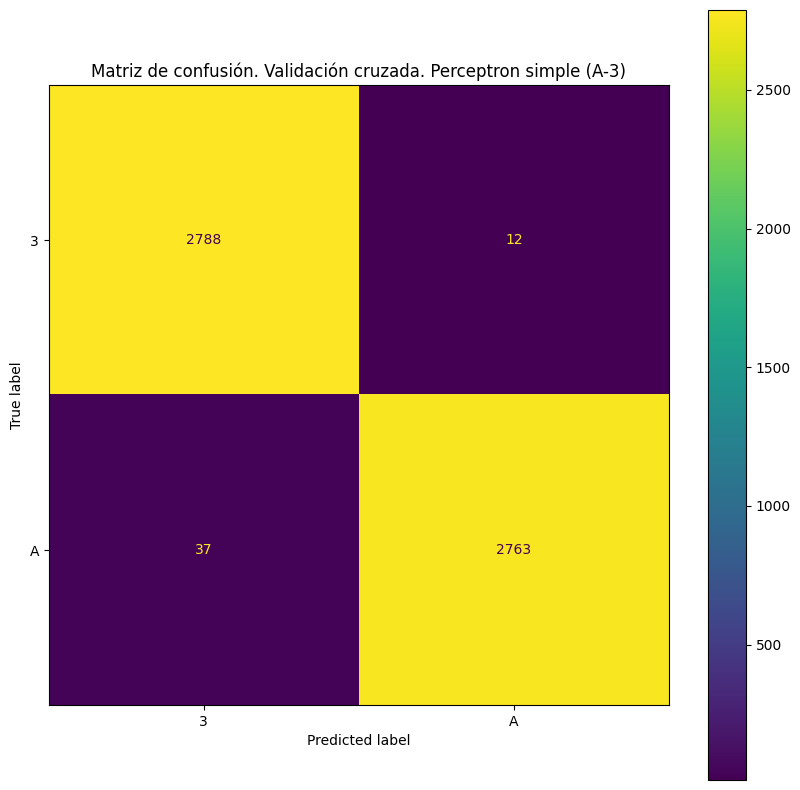

Porcentaje de acierto: 0.99125
Exactitud: 0.99125
Precisión: [0.98690265 0.99567568]
Sensibilidad: [0.99571429 0.98678571]


In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
import numpy as np

# Filtrar para las clases 'A' y '3' en los datos combinados
X_2C = Ximage_ultimo[((yimage_ultimo == 'A') | (yimage_ultimo == '3'))]
y_2C = yimage_ultimo[((yimage_ultimo == 'A') | (yimage_ultimo == '3'))]

# Validación cruzada con el perceptrón simple de sklearn
y_2C_pred = cross_val_predict(Perceptron(random_state=None, eta0=0.1, shuffle=False, fit_intercept=False), 
                              X_2C, y_2C, cv=3)

# Generar la matriz de confusión
labels = np.unique(y_2C)
conf_mat = confusion_matrix(y_2C, y_2C_pred, labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión. Validación cruzada. Perceptron simple (A-3)")
plt.show()

# Calcular y mostrar las métricas
porcentaje_acierto = evalua(y_2C, y_2C_pred)
print("Porcentaje de acierto: " + str(porcentaje_acierto))

accuracy = metrics.accuracy_score(y_2C, y_2C_pred)
print("Exactitud: " + str(accuracy))

precision = metrics.precision_score(y_2C, y_2C_pred, average=None)
print("Precisión: " + str(precision))

sensibilidad = metrics.recall_score(y_2C, y_2C_pred, average=None)
print("Sensibilidad: " + str(sensibilidad))


### Matriz de validación cruzada para perceptrón multicapa datos nuevos

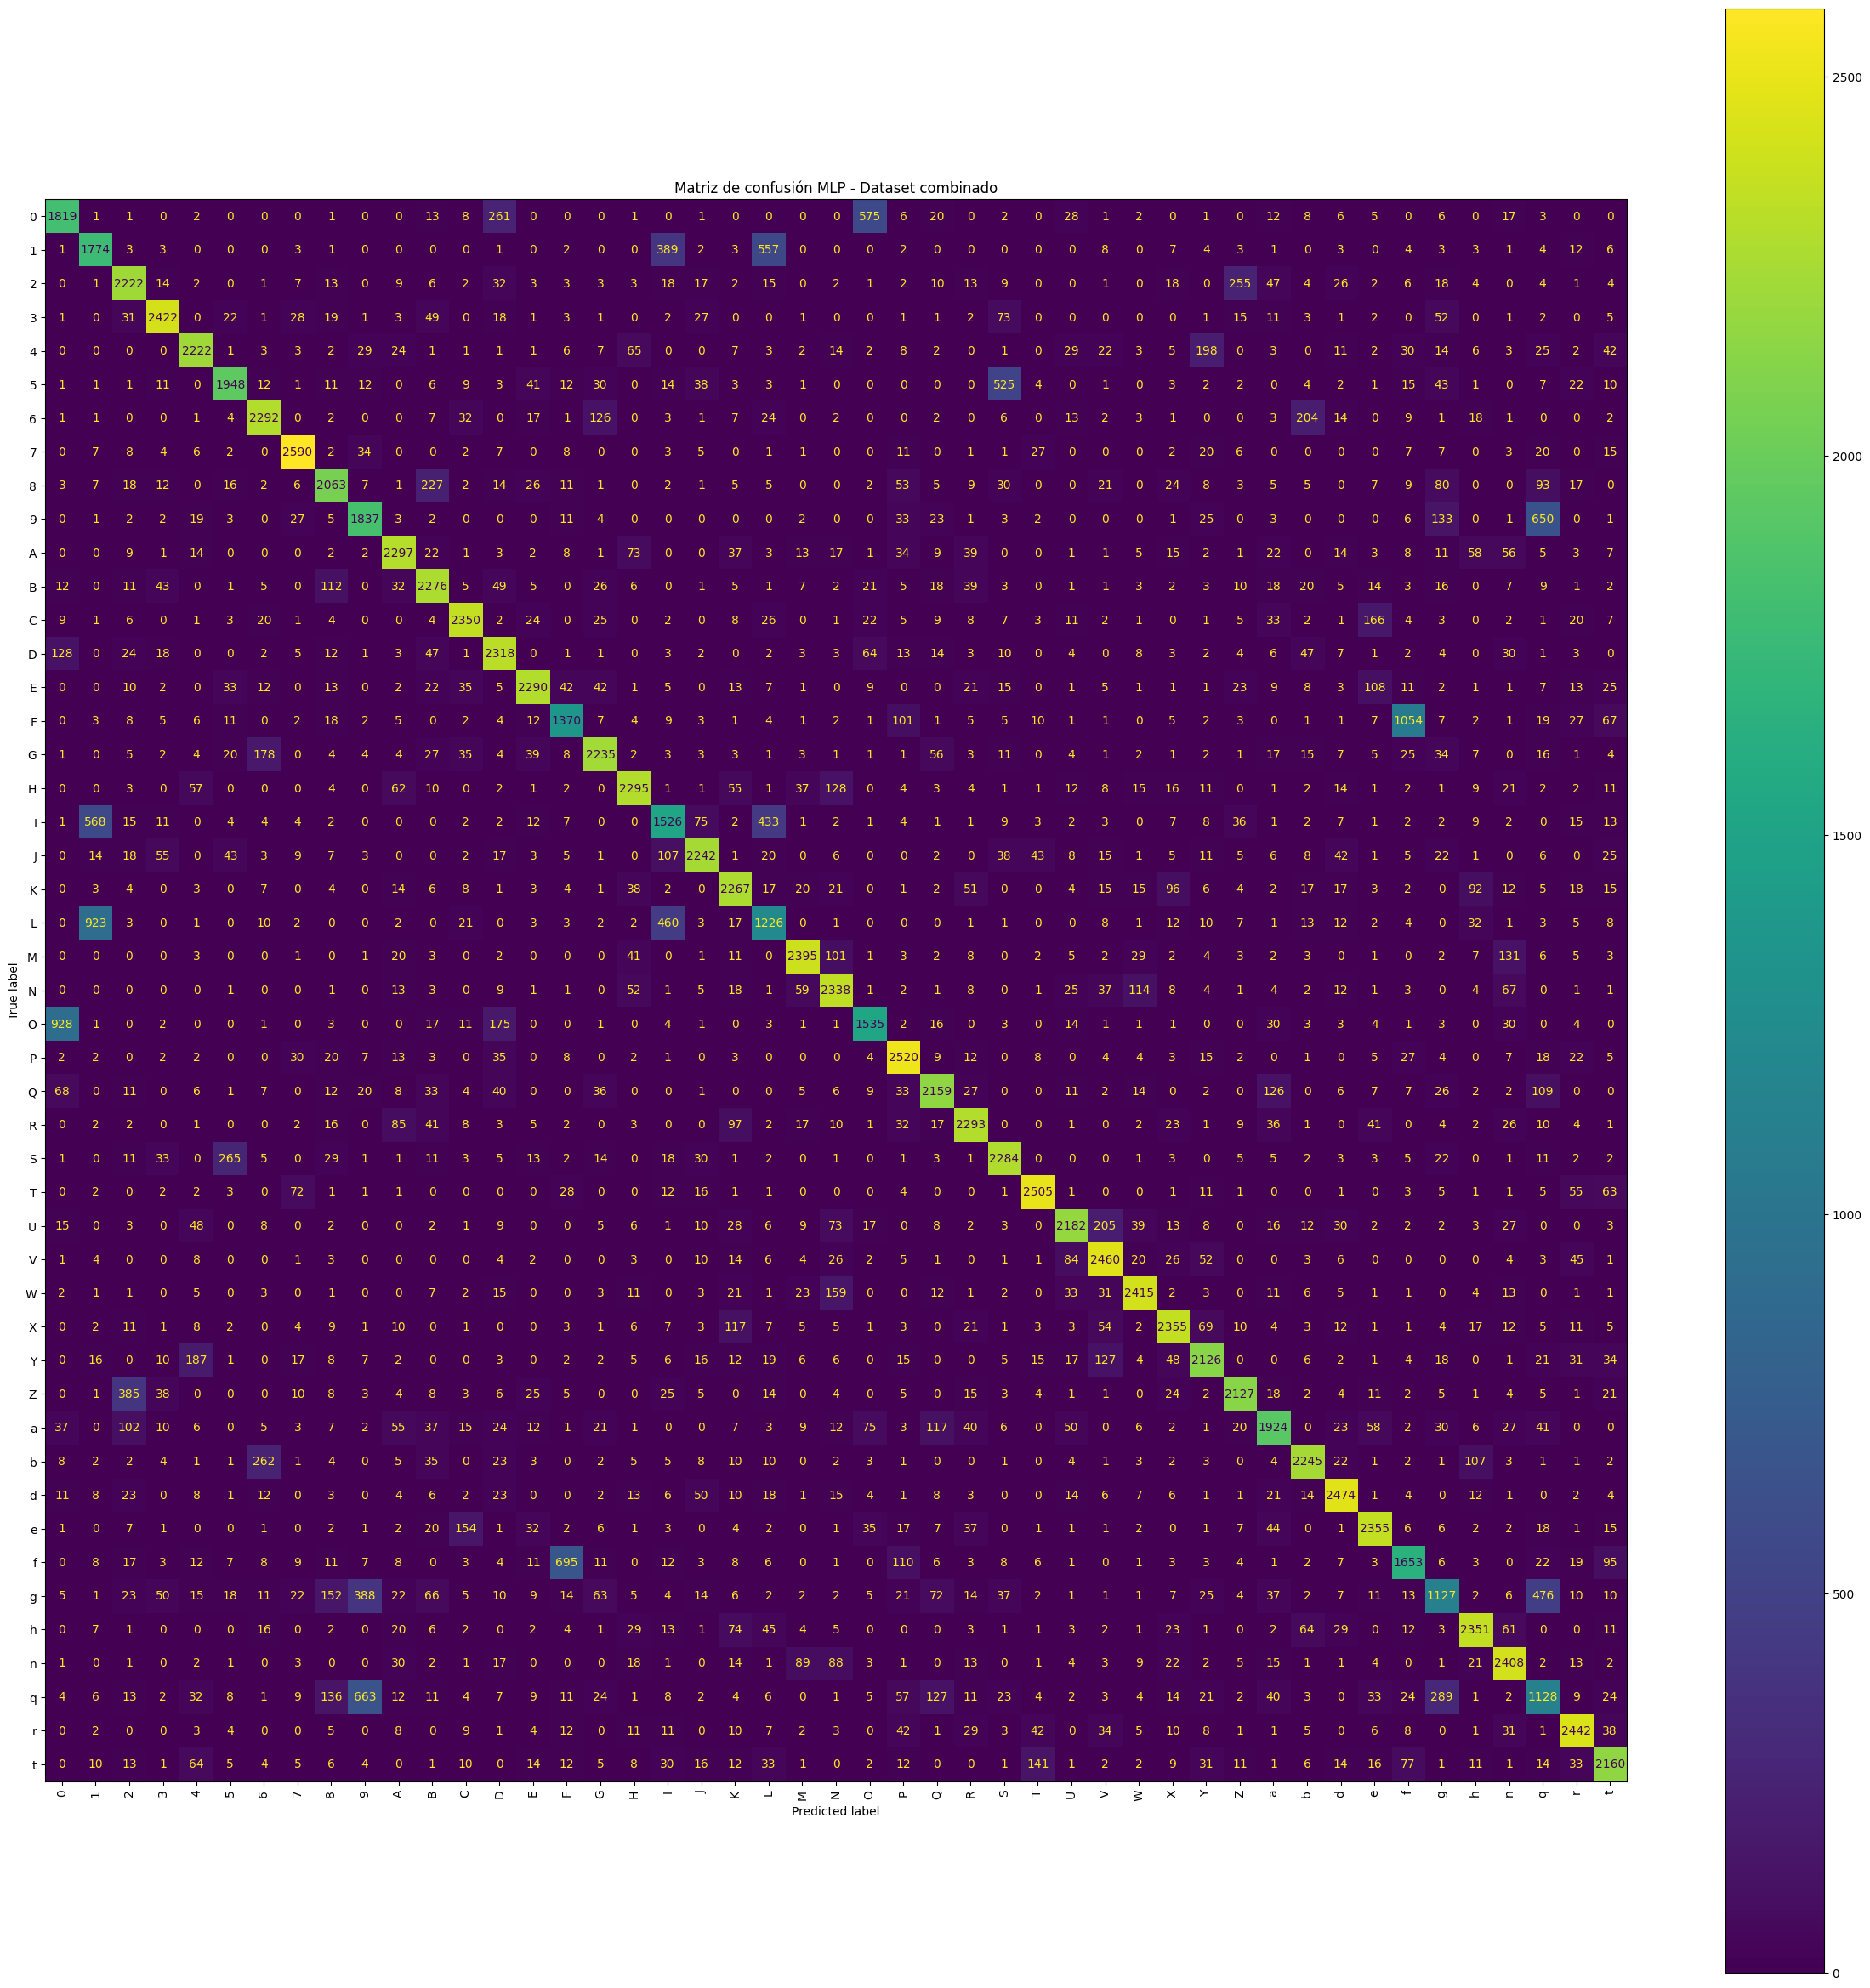

Exactitud: 0.758677811550152
Precisión: [0.59425025 0.52485207 0.7338177  0.87626628 0.80770629 0.80197612
 0.79143646 0.90024331 0.75237053 0.60467413 0.82507184 0.74942377
 0.85268505 0.7335443  0.87238095 0.59333045 0.82472325 0.84655109
 0.56164888 0.85670615 0.77690199 0.48191824 0.87889908 0.76355323
 0.63878485 0.79395085 0.78680758 0.83625091 0.72901372 0.88515901
 0.84672099 0.79534433 0.87946103 0.83186153 0.7839233  0.81933744
 0.75658671 0.8166606  0.86654991 0.81290991 0.53931485 0.55847374
 0.83934309 0.79524439 0.40604752 0.84968685 0.77978339]
Sensibilidad: [0.64964286 0.63357143 0.79357143 0.865      0.79357143 0.69571429
 0.81857143 0.925      0.73678571 0.65607143 0.82035714 0.81285714
 0.83928571 0.82785714 0.81785714 0.48928571 0.79821429 0.81964286
 0.545      0.80071429 0.80964286 0.43785714 0.85535714 0.835
 0.54821429 0.9        0.77107143 0.81892857 0.81571429 0.89464286
 0.77928571 0.87857143 0.8625     0.84107143 0.75928571 0.75964286
 0.68714286 0.80178571 

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

# Generar predicciones usando validación cruzada con el perceptrón multicapa
y_pred = cross_val_predict(MLPClassifier(), Ximage_ultimo, yimage_ultimo, cv=3)

# Obtener las etiquetas únicas
labels = np.unique(yimage_ultimo)

# Crear la matriz de confusión
conf_mat = confusion_matrix(yimage_ultimo, y_pred, labels=labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(30, 30))
cm_display.plot(ax=ax)
plt.xticks(rotation='vertical')
plt.title("Matriz de confusión MLP - Dataset combinado")
plt.show()

accuracy=metrics.accuracy_score(yimage_ultimo, y_pred)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(yimage_ultimo, y_pred, average=None) 
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(yimage_ultimo, y_pred, average=None)
print("Sensibilidad: " + str(sensibilidad))

precision_promedio = metrics.precision_score(yimage_ultimo, y_pred, average='macro')
sensibilidad_promedio = metrics.recall_score(yimage_ultimo, y_pred, average='macro')

print("Precisión promedio: " + str(precision_promedio))
print("Sensibilidad promedio: " + str(sensibilidad_promedio))
